Installing dependencies
!pip install tensorflow tensorflow-gpu opencv-python matplotlib
(kuch glt bhi ho sakta check in copilot GPU REMOVED)

# INSTALL DEPENDENCIES AND SETTING GPU LIMITED

In [1]:

import os



# Remove dodgy images

In [2]:
import cv2 #type: ignore
import imghdr
import matplotlib.pyplot as plt     # type: ignore
import tensorflow as tf   # type: ignore #type ignore

C:\Program Files\KMSpico\temp\ipykernel_12824\2838810408.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [3]:
data_dir = r'D:\College Minor Project\Wasification\data2'
os.listdir(data_dir)

['can', 'glass', 'paper', 'plastic', 'plastic_bag', 'styrofoam']

In [4]:
# Load the image
img=cv2.imread(os.path.join(data_dir, 'can', 'IMG_8482.jpeg'))

In [5]:
if img is not None:
    print(img.shape)
else:
    print("Failed to load image.")


(3024, 4032, 3)


In [11]:
print(img.shape)
import numpy as np #type: ignore

(3024, 4032, 3)


In [13]:
random_image=np.random.random([500,500,3])

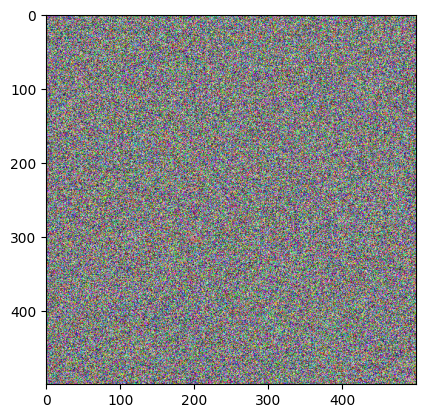

In [16]:
plt.imshow(random_image)

In [19]:
print(random_image.max())

0.999997711142473


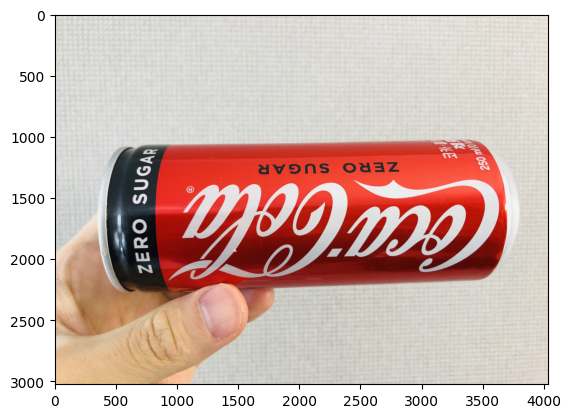

In [6]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
#fixing colors alos

In [7]:
image_exts = ['jpg','jpeg','png','bmp'] # list of valid image extensions

In [8]:
image_exts[0] #accessing the first element of the list

'jpg'

In [9]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir,image_class)):
       image_path = os.path.join(data_dir,image_class,image)
       try:
           img=cv2.imread(image_path)
           tip=imghdr.what(image_path)
           if tip not in image_exts:
               print(f'image not in ext list {image_path}')
               os.remove(image_path)
       except Exception as e:
            print(f'Error processing image {image_path} {e}')
            os.remove(image_path)     

#deleted the images which are not in the list of image_exts  

# Load Data

In [10]:
import numpy as np #type: ignore
from matplotlib import pyplot as plt #type: ignore

In [11]:
#streamline process and automatically labels
# now going to load data ,this util will shuffle resize and batch the data and also will preprocess the data
data=tf.keras.utils.image_dataset_from_directory(data_dir,batch_size=282) 
#use comma and you can change batch size and image size

Found 283 files belonging to 6 classes.


In [12]:
data

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [13]:
#checking each data or iterating through the data 
# allowing us to acces the data as numpy array and as data pipeline
#iterator at previous and batch as next

data_iterator=data.as_numpy_iterator()


In [14]:
#get another batch
batch=data_iterator.next()

In [15]:
len(batch)
#two parts one as data and other as labels (image representation )


2

In [16]:
batch[0]

array([[[[234.77734  , 203.25     , 147.21484  ],
         [236.08203  , 204.33203  , 150.70703  ],
         [237.375    , 205.625    , 152.       ],
         ...,
         [  9.222656 ,  75.47266  , 130.84766  ],
         [  7.296875 ,  73.546875 , 128.92188  ],
         [  1.1875   ,  63.4375   , 120.625    ]],

        [[233.125    , 198.125    , 142.83594  ],
         [235.875    , 200.875    , 146.875    ],
         [236.9961   , 201.9961   , 147.9961   ],
         ...,
         [  6.9804688,  65.80078  , 123.76953  ],
         [  8.2265625,  67.66406  , 125.44531  ],
         [  5.0195312,  65.01953  , 125.83203  ]],

        [[233.64453  , 197.64453  , 137.64453  ],
         [234.       , 198.       , 140.       ],
         [235.       , 199.       , 141.       ],
         ...,
         [  6.9335938,  62.933594 , 121.93359  ],
         [  8.855469 ,  64.85547  , 123.85547  ],
         [  2.890625 ,  62.433594 , 122.43359  ]],

        ...,

        [[ 65.87891  ,  22.472656 ,  1

In [17]:
#image representation as numpy array
batch[0].shape   # (batch_size, height, width, channels=number of color channels e.g rgb)
#making the size of each image component 

(282, 256, 256, 3)

In [18]:
#in each batch one class get one label 
#here in ours ,class 0 is can and class 1 is glass and class 2 is paper  and class 3 is glass and class 4 is plastic bag 
#class 5 is styrofoam
batch[1]

array([3, 4, 4, 2, 1, 1, 2, 1, 0, 3, 2, 3, 3, 3, 2, 3, 3, 4, 1, 5, 1, 4,
       3, 1, 4, 3, 2, 2, 3, 2, 1, 1, 2, 0, 2, 4, 2, 1, 2, 4, 0, 3, 2, 2,
       4, 0, 3, 1, 4, 0, 5, 2, 2, 3, 3, 1, 2, 5, 4, 3, 4, 0, 3, 3, 3, 3,
       0, 3, 2, 1, 1, 4, 4, 2, 3, 3, 5, 3, 3, 1, 1, 4, 2, 2, 3, 0, 2, 2,
       3, 3, 5, 4, 3, 5, 0, 3, 1, 1, 4, 0, 2, 1, 2, 2, 3, 1, 1, 3, 1, 1,
       3, 2, 0, 3, 1, 2, 3, 3, 5, 0, 2, 1, 4, 1, 2, 1, 3, 5, 5, 3, 1, 1,
       3, 4, 2, 1, 2, 0, 1, 4, 2, 3, 2, 1, 3, 1, 3, 3, 0, 1, 2, 1, 0, 4,
       2, 3, 5, 3, 0, 2, 0, 3, 3, 1, 1, 3, 2, 3, 2, 4, 3, 4, 1, 4, 0, 4,
       1, 1, 3, 0, 5, 5, 2, 0, 1, 2, 3, 1, 4, 2, 3, 3, 3, 1, 3, 3, 3, 3,
       2, 2, 3, 5, 1, 4, 3, 5, 5, 2, 4, 1, 4, 1, 0, 3, 3, 3, 3, 1, 3, 3,
       5, 0, 5, 4, 4, 2, 3, 2, 0, 5, 1, 3, 1, 2, 1, 3, 2, 2, 1, 3, 2, 3,
       1, 2, 3, 3, 1, 1, 3, 3, 3, 1, 4, 1, 2, 3, 1, 0, 5, 2, 4, 3, 0, 3,
       4, 1, 3, 4, 3, 3, 0, 3, 1, 4, 1, 1, 2, 3, 3, 2, 4, 4])

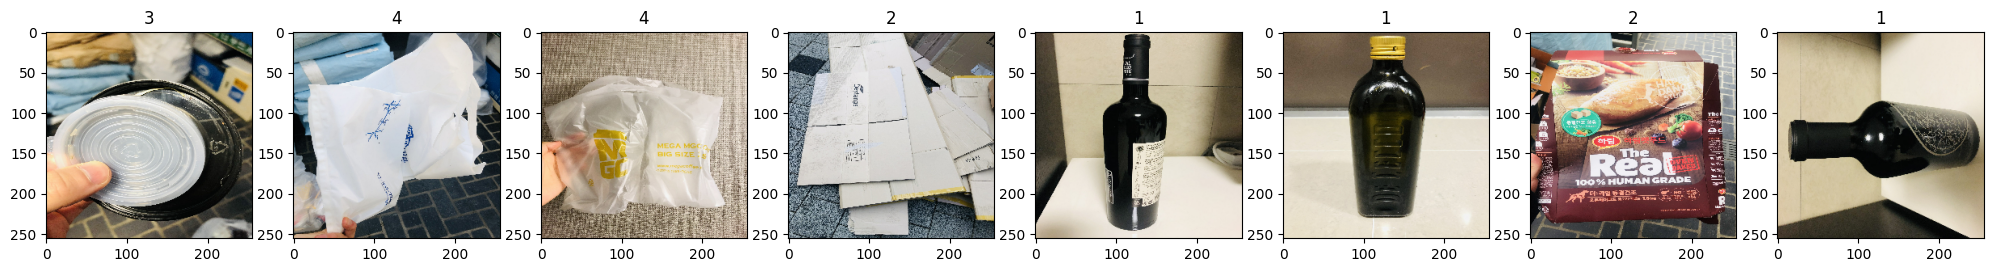

In [19]:
fig,ax =plt.subplots(ncols=8,figsize=(25,25))
for idx, img in enumerate(batch[0][:8]):
    ax[idx].imshow(img.astype(int))    
    ax[idx].title.set_text(batch[1][idx])


# PRE-PROCESS THE DATA

#scaling the data 

In [20]:
batch[0].min()

0.0

In [21]:
batch[0].max()

255.0

In [22]:
#batch[0] is image part while batch[1] is label 
#converting values from  0 to 1
scaled=batch[0]/255


In [23]:
scaled.min()


0.0

In [24]:
scaled.max()

1.0

In [25]:
#transforming data pipelines
#x represents images while y represents labels
data=data.map(lambda x,y :(x/225,y))

In [26]:
#grabbing first set of images
scaled_iterator=data.as_numpy_iterator()

In [27]:
batch=scaled_iterator.next()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.1333333].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.1288888].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.004596354..1.1333333].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.00109375..1.1194445].


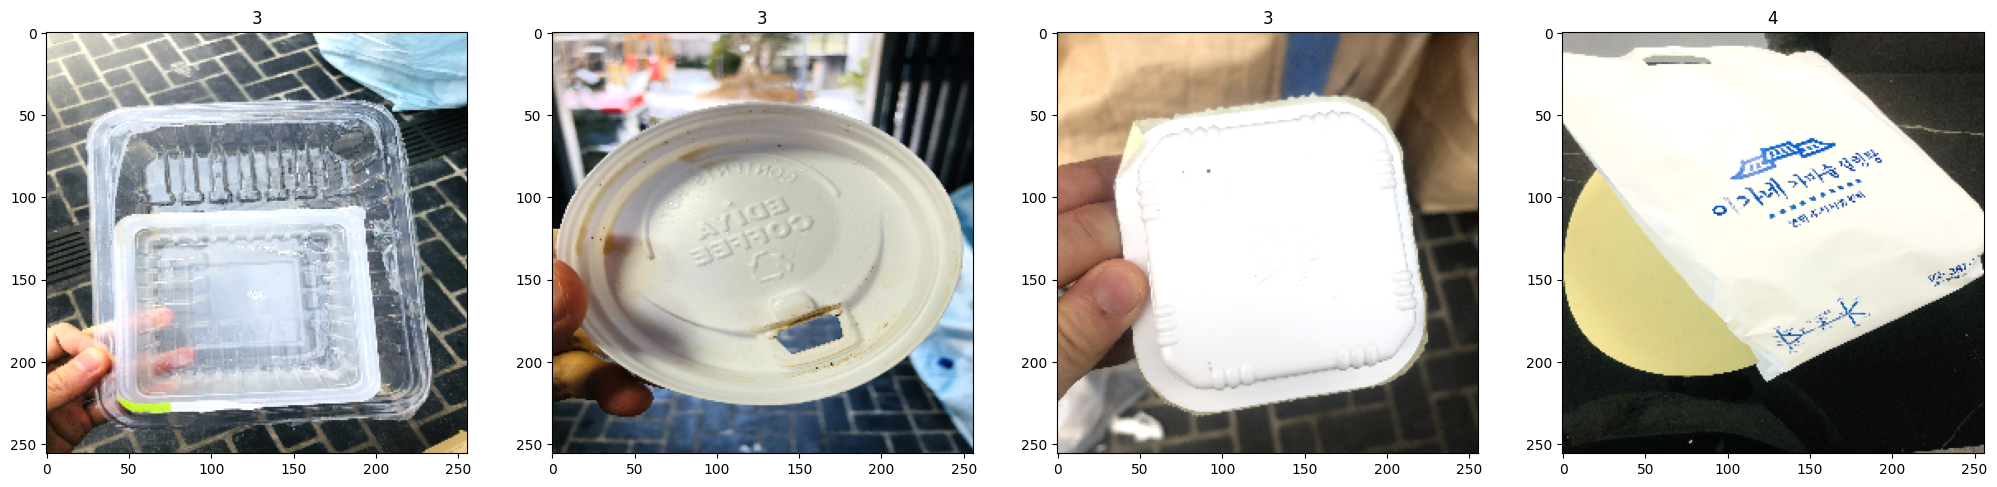

In [28]:
fig,ax =plt.subplots(ncols=4,figsize=(25,25))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img) #as astype int will make 0 to 1 value as 0    
    ax[idx].title.set_text(batch[1][idx])


In [29]:
batch[0]

array([[[[1.0265452 , 0.9964236 , 0.9101389 ],
         [0.98041666, 0.94930553, 0.86486113],
         [1.0346701 , 1.003559  , 0.92189234],
         ...,
         [0.6443576 , 0.8443576 , 0.937691  ],
         [0.6427778 , 0.8427778 , 0.9361111 ],
         [0.6488889 , 0.83819443, 0.9280556 ]],

        [[1.0757812 , 1.0446701 , 0.9602257 ],
         [1.0368229 , 1.0146008 , 0.91876733],
         [0.9147396 , 0.89237845, 0.8083507 ],
         ...,
         [0.6315278 , 0.83152777, 0.92486113],
         [0.6488889 , 0.8488889 , 0.94222224],
         [0.6106424 , 0.8239757 , 0.91286457]],

        [[1.0343056 , 1.0031945 , 0.91875   ],
         [0.9575    , 0.93083334, 0.8597222 ],
         [0.91986114, 0.89319444, 0.8309722 ],
         ...,
         [0.6531944 , 0.8531944 , 0.9465278 ],
         [0.62319446, 0.82861114, 0.92791665],
         [0.6115278 , 0.8248611 , 0.91375   ]],

        ...,

        [[0.2075    , 0.1275    , 0.07416666],
         [0.22555555, 0.13666667, 0.08777778]

# Spliting the data

In [30]:
#len(data) #number of batches

In [31]:
# train_size=int(0.7*len(data)) 
# val_size=int(0.2*len(data))+1
# test_size=int(0.1*len(data))+1  #so that we dont have any data left

In [32]:
# test_size+val_size+train_size

In [33]:
# train=data.take(train_size)  # data used for training
# val=data.skip(train_size).take(val_size) # data used for overfitting and models
# test=data.skip(train_size+val_size).take(test_size) #data used for testing
#how much data to take from each


# Creating Data Frames

In [34]:
import pandas as pd  #type: ignore
from tabulate import tabulate # type: ignore

In [35]:
images = np.array(batch[0])
labels = np.array(batch[1])

In [36]:
images.max()

1.1333333

In [37]:
data1 = {
    
    'Height': [batch[0][i].shape[0] for i in range(batch[0].shape[0])],
    'Width': [batch[0][i].shape[1] for i in range(batch[0].shape[0])],
    'Red_Channel': [batch[0][i][:, :, 0] for i in range(batch[0].shape[0])],
    'Green_Channel': [batch[0][i][:, :, 1] for i in range(batch[0].shape[0])],
    'Blue_Channel': [batch[0][i][:, :, 2] for i in range(batch[0].shape[0])],
    'Label': [batch[1][i] for i in range(batch[1].shape[0])],
}

df = pd.DataFrame(data1)
df

,Height,Width,Red_Channel,Green_Channel,Blue_Channel,Label
0,256,256,"[[1.0265452, 0.98041666, 1.0346701, 1.0381597,...","[[0.9964236, 0.94930553, 1.003559, 1.0114931, ...","[[0.9101389, 0.86486113, 0.92189234, 0.9137153...",3
1,256,256,"[[0.72444445, 0.7359722, 0.76166666, 0.7773437...","[[0.6855556, 0.69708335, 0.722691, 0.7384549, ...","[[0.6294444, 0.6498611, 0.67569447, 0.6912326,...",3
2,256,256,"[[0.7291276, 0.77210504, 0.79555553, 0.8106944...","[[0.57884985, 0.6123177, 0.64, 0.6551389, 0.64...","[[0.3931554, 0.43595052, 0.46222222, 0.4773611...",3
3,256,256,"[[0.6668229, 0.6621701, 0.6778646, 0.68848956,...","[[0.6498785, 0.6488368, 0.66453123, 0.66626734...","[[0.6294618, 0.6266146, 0.642309, 0.6396007, 0...",4
4,256,256,"[[1.0046006, 1.0181423, 1.0249653, 1.0425173, ...","[[0.9678993, 0.9863021, 0.98940974, 1.0069618,...","[[0.9351389, 0.95739585, 0.9761632, 0.9980729,...",0
...,...,...,...,...,...,...
277,256,256,"[[0.90447915, 0.89621526, 0.89416665, 0.88875,...","[[0.80670136, 0.7984375, 0.79194444, 0.7865277...","[[0.6422569, 0.633993, 0.6408333, 0.6443055, 0...",3
278,256,256,"[[0.7826736, 0.76515627, 0.7670139, 0.75401044...","[[0.74267364, 0.70737845, 0.7092361, 0.6962326...","[[0.56604165, 0.5518229, 0.55368054, 0.5406771...",0
279,256,256,"[[1.0301216, 1.0311111, 1.0266666, 1.0240278, ...","[[1.074566, 1.0755556, 1.0711111, 1.0684723, 1...","[[1.0790104, 1.08, 1.0773611, 1.0773611, 1.091...",2
280,256,256,"[[0.7961111, 0.79746526, 0.8099132, 0.8303125,...","[[0.8194444, 0.82019097, 0.8293576, 0.8436458,...","[[0.8211111, 0.8244097, 0.84269094, 0.86586803...",5


In [ ]:
# red ,green, blue ,alpha and pixels